# Introduction

In this project, you will act as a data visualization developer at Yahoo Finance! You will be helping the "Netflix Stock Profile" team visualize the Netflix stock data. In finance, a _stock profile_ is a series of studies, visualizations, and analyses that dive into different aspects a publicly traded company's data. 

For the purposes of the project, you will only visualize data for the year of 2017. Specifically, you will be in charge of creating the following visualizations:
+ The distribution of the stock prices for the past year
+ Netflix's earnings and revenue in the last four quarters
+ The actual vs. estimated earnings per share for the four quarters in 2017
+ A comparison of the Netflix Stock price vs the Dow Jones Industrial Average price in 2017 

Note: We are using the Dow Jones Industrial Average to compare the Netflix stock to the larter stock market. Learn more about why the Dow Jones Industrial Average is a general reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp).

During this project, you will analyze, prepare, and plot data. Your visualizations will help the financial analysts asses the risk of the Netflix stock.

After you complete your visualizations, you'll be creating a presentation to share the images with the rest of the Netflix Stock Profile team. Your slides should include:

- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017

Financial Data Source: [Yahoo Finance](https://finance.yahoo.com/quote/DATA/)


## Step 1

Let's get our notebook ready for visualizing! Import the modules that you'll be using in this project:
- `from matplotlib import pyplot as plt`
- `import pandas as pd`
- `import seaborn as sns`

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Step 2

Let's load the datasets and inspect them.

Load **NFLX.csv** into a DataFrame called `netflix_stocks`. Then, quickly inspect the DataFrame using `print()`.

Hint: Use the `pd.read_csv()`function).

Note: In the Yahoo Data, `Adj Close` represents the adjusted close price adjusted for both dividends and splits. This means this is the true closing stock price for a given business day.

In [2]:
netflix_stocks = pd.read_csv('NFLX.csv')
print(netflix_stocks.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


Load **DJI.csv** into a DataFrame called `dowjones_stocks`. Then, quickly inspect the DataFrame using `print()`.

Note: You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 


In [3]:
dowjones_stocks = pd.read_csv('DJI.csv')
print(dowjones_stocks.head())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

      Adj Close      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000  


Load **NFLX_daily_by_quarter.csv** into a DataFrame called `netflix_stocks_quarterly`. Then, quickly inspect the DataFrame using `print()`.


In [4]:
netflix_stocks_quarterly =pd.read_csv('NFLX_daily_by_quarter.csv')
print(netflix_stocks_quarterly.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007   
4  2017-01-09  131.479996  131.990005  129.889999  130.949997  130.949997   

     Volume Quarter  
0   9437900      Q1  
1   7843600      Q1  
2  10185500      Q1  
3  10657900      Q1  
4   5766900      Q1  


## Step 3

Let's learn more about our data. The datasets are large and it may be easier to view the entire dataset locally on your computer. Open the CSV files directly from the folder you downloaded for this project.
 - `NFLX` is the stock ticker symbol for Netflix and `^DJI` is the stock ticker symbol for the Dow Jones industrial Average, which is why the CSV files are named accordingly
 - In the Yahoo Data, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.
 - You can learn more about why the Dow Jones Industrial Average is a industry reflection of the larger stock market [here](https://www.investopedia.com/terms/d/djia.asp). 
 
Answer the following questions by inspecting the data in the **NFLX.csv**,**DJI.csv**, and **NFLX_daily_by_quarter.csv** in your computer.

What year is represented in the data? Look out for the latest and earliest date.

In [5]:
# earliest and latest dates in NFLX.csv:
print("Earliest: ", netflix_stocks.Date.min(), "   Latest: ", netflix_stocks.Date.max())

# earliest and latest dates in DJI.csv:
print("Earliest: ", dowjones_stocks.Date.min(), "   Latest: ", dowjones_stocks.Date.max())

# earliest and latest dates in NFLX_daily_by_quater.csv:
print("Earliest: ", netflix_stocks_quarterly.Date.min(), "   Latest: ", netflix_stocks_quarterly.Date.max())

# Thus, all of 2017 appears to be represented in the data. The earliest date (in both NFLX.csv and DJI.csv) is
# January 1, 2017, and the latest date (in NFLX_daily_by_quater) is December 29, 2017.

Earliest:  2017-01-01    Latest:  2017-12-01
Earliest:  2017-01-01    Latest:  2017-12-01
Earliest:  2017-01-03    Latest:  2017-12-29


+ Is the data represented by days, weeks, or months? 
+ In which ways are the files different? 
+ What's different about the columns for `netflix_stocks` versus `netflix_stocks_quarterly`?

In [6]:
# By inspecting the first 5 lines of each file (as well as column names) using .header(), it appears as though the data
# in NFLX.csv and DJI.csv are represented by months. However, the data in NFLX_daily_by_quarter is represented by days.

# NFLX.csv and DJI.csv had identical schema, but the actual data contents are clearly different because NFLX.csv 
# represents data for Netflix stock only, whereas DJI.csv represents the data of the Dow Jones Industrial Average.
# (Also, the columns "Close" and "Adj Close" appear to be identical. I do not know if this is intentional, or a 
# flaw in the provided data.) NFXL_daily_by_quarter has an almost identical structure to the other two files, but
# has an additional column indicating which fiscal quarter the data is from, and is represented in days not years.

# In terms of schema, netflix_stocks and netflix_stocks_quarterly are almost identical, as noted above. However, 
# netflix_stocks represents data over an entire month, and so has data on stock prices at the beginning of the
# month and at the close of the month. However, in addition to providing the fiscal quarter each data point falls
# into, NFLX_daily_by_quarter represents data over just one day, and so has data on stock prices at the beginning
# of trading and at the close of trading.

## Step 4

Great! Now that we have spent sometime looking at the data, let's look at the column names of the DataFrame `netflix_stocks` using `.head()`. 

In [7]:
# I just did this above. But for the sake of clarity, I re-type the relevant command here.

print(netflix_stocks.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


What do you notice? The first two column names are one word each, and the only one that is not is `Adj Close`! 

The term `Adj Close` is a confusing term if you don't read the Yahoo Documentation. In Yahoo, `Adj Close` is documented as adjusted close price adjusted for both dividends and splits.

This means this is the column with the true closing price, so these data are very important.

Use Pandas to change the name of of the column to `Adj Close` to `Price` so that it is easier to work with the data. Remember to use `inplace=True`.

Do this for the Dow Jones and Netflix Quarterly pandas dataframes as well.
Hint: Use [`.rename()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)).


In [8]:
# I still don't understand why "Close" and "Adj Close" are identical if "Adj Close" is meant to be adjusted for dividends
# and splits.

netflix_stocks.rename(columns = {"Adj Close": "Price"}, inplace = True)
dowjones_stocks.rename(columns = {"Adj Close": "Price"}, inplace = True)
netflix_stocks_quarterly.rename(columns = {"Adj Close": "Price"}, inplace = True)

Run `netflix_stocks.head()` again to check your column name has changed.

In [9]:
print(netflix_stocks.head())

         Date        Open        High         Low       Close       Price  \
0  2017-01-01  124.959999  143.460007  124.309998  140.710007  140.710007   
1  2017-02-01  141.199997  145.949997  139.050003  142.130005  142.130005   
2  2017-03-01  142.839996  148.289993  138.259995  147.809998  147.809998   
3  2017-04-01  146.699997  153.520004  138.660004  152.199997  152.199997   
4  2017-05-01  151.910004  164.750000  151.610001  163.070007  163.070007   

      Volume  
0  181772200  
1   91432000  
2  110692700  
3  149769200  
4  116795800  


Call `.head()` on the DataFrame `dowjones_stocks` and `netflix_stocks_quarterly`.

In [10]:
print(dowjones_stocks.head())
print(netflix_stocks_quarterly.head())

         Date          Open          High           Low         Close  \
0  2017-01-01  19872.859375  20125.580078  19677.939453  19864.089844   
1  2017-02-01  19923.810547  20851.330078  19831.089844  20812.240234   
2  2017-03-01  20957.289063  21169.109375  20412.800781  20663.220703   
3  2017-04-01  20665.169922  21070.900391  20379.550781  20940.509766   
4  2017-05-01  20962.730469  21112.320313  20553.449219  21008.650391   

          Price      Volume  
0  19864.089844  6482450000  
1  20812.240234  6185580000  
2  20663.220703  6941970000  
3  20940.509766  5392630000  
4  21008.650391  6613570000  
         Date        Open        High         Low       Close       Price  \
0  2017-01-03  124.959999  128.190002  124.309998  127.489998  127.489998   
1  2017-01-04  127.489998  130.169998  126.550003  129.410004  129.410004   
2  2017-01-05  129.220001  132.750000  128.899994  131.809998  131.809998   
3  2017-01-06  132.080002  133.880005  129.809998  131.070007  131.070007

## Step 5

In this step, we will be visualizing the Netflix quarterly data! 

We want to get an understanding of the distribution of the Netflix quarterly stock prices for 2017. Specifically, we want to see in which quarter stock prices flucutated the most. We can accomplish this using a violin plot with four violins, one for each business quarter!


1. Start by creating a variable `ax` and setting it equal to `sns.violinplot()`. This will instantiate a figure and give us access to the axes through the variable name `ax`.
2. Use `sns.violinplot()` and pass in the following arguments:
+ The `Quarter` column as the `x` values
+ The `Price` column as your `y` values
+ The `netflix_stocks_quarterly` dataframe as your `data`
3. Improve the readability of the chart by adding a title of the plot. Add `"Distribution of 2017 Netflix Stock Prices by Quarter"` by using `ax.set_title()`
4. Change your `ylabel` to "Closing Stock Price"
5. Change your `xlabel` to "Business Quarters in 2017"
6. Be sure to show your plot!


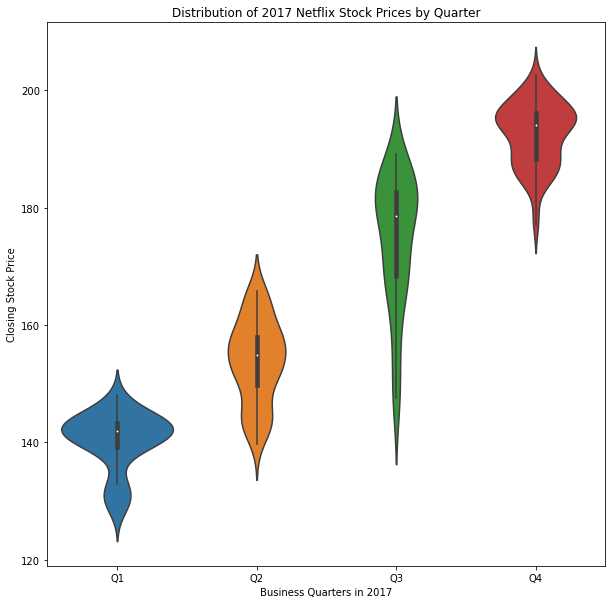

In [11]:
plt.figure(figsize = (10,10))
ax = sns.violinplot()
sns.violinplot(data = netflix_stocks_quarterly, x = 'Quarter', y = 'Price')
ax.set_title("Distribution of 2017 Netflix Stock Prices by Quarter")
ax.set_ylabel("Closing Stock Price")
ax.set_xlabel("Business Quarters in 2017")
plt.savefig('netflix_quarterly_stock_violin.png')
plt.show()

## Graph Literacy
- What are your first impressions looking at the visualized data?

- In what range(s) did most of the prices fall throughout the year?

- What were the highest and lowest prices? 

MAC: 
Bullet 1 :
Looking at the violin plot, I see that Q1 and Q4 data are largely bimodal with one prominent peak and one weaker peak.  The Q2 data is somewhat bimodal, though the peaks are similar in broadness and peak height. The Q3 data is by far the most interesting shape; it is unimodal, with a very, very long tail toward smaller closing prices. Q1 has the "tightest" distribution and the smallest interquartile range. Q3 naturally has the broadest overall distribution and the widest interquartile range.

Bullet 2 :
Very broadly speaking, the range of the entire dataset is about $120 to $210. Looking more specifically at each quarter ...
The range of Q1 closing prices is roughly $120 - $150
The range of Q2 closing prices is roughly $130 - $170
The range of Q3 closing prices is roughly $130 - $200
The range of Q4 closing prices is roughly $170 - $210

Bullet 3 :
The highest average price was in Q4, and it is roughly $195. The lowest average price was in Q1, and it is roughly $142. In terms of the overall distributions, the global lowest price was in Q1 at roughly $124, whereas the global highest price was in Q4 at roughly $206. 
Going by quarters (and just reading off this plot, which strikes me as a bad way to arrive at these estimates), 
Q1 Min: $124       Q1Max: $154      Q1Avg: $142
Q2 Min: $132       Q2Max: $174      Q2Avg: $154
Q3 Min: $134       Q3Max: $200      Q3Avg: $178
Q4 Min: $170       Q4Max: $206      Q4Avg: $195

## Step 6

Next, we will chart the performance of the earnings per share (EPS) by graphing the estimate Yahoo projected for the Quarter compared to the actual earnings for that quarters. We will accomplish this using a scatter chart. 

1. Plot the actual EPS by using `x_positions` and `earnings_actual` with the `plt.scatter()` function. Assign `red` as the color.
2. Plot the actual EPS by using `x_positions` and `earnings_estimate` with the `plt.scatter()` function. Assign `blue` as the color

3. Often, estimates and actual EPS are the same. To account for this, be sure to set your transparency  `alpha=0.5` to allow for visibility pf overlapping datapoint.
4. Add a legend by using `plt.legend()` and passing in a list with two strings `["Actual", "Estimate"]`

5. Change the `x_ticks` label to reflect each quarter by using `plt.xticks(x_positions, chart_labels)`
6. Assing "`"Earnings Per Share in Cents"` as the title of your plot.


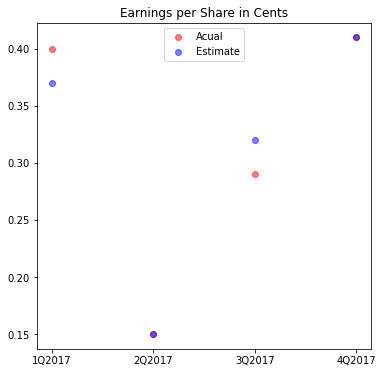

In [12]:
# Can we pause to appreciate the hilarious typo in step #6??

x_positions = [1, 2, 3, 4]
chart_labels = ["1Q2017","2Q2017","3Q2017","4Q2017"]
earnings_actual =[.4, .15,.29,.41]
earnings_estimate = [.37,.15,.32,.41 ]

# The arrays earnings_actual and earnings_estimate were provided by Codecademy. I did not calculate these. 
# I am using them assuming that the calculations were done correctly.

plt.figure(figsize = (6, 6))
plt.scatter(x_positions, earnings_actual, color = 'red', alpha = 0.5)
plt.scatter(x_positions, earnings_estimate, color = 'blue', alpha = 0.5)
plt.xticks(x_positions, chart_labels)
plt.legend(['Acual', 'Estimate'], loc = 9)
plt.title('Earnings per Share in Cents')
plt.savefig('netflix_earning_per_share.png')
plt.show()

## Graph Literacy

+ What do the purple dots tell us about the actual and estimate earnings per share in this graph? Hint: In color theory red and blue mix to make purple.


Answer: The purple plots indicate that the actual and estimated earnings were the same.  

## Step 7

Next, we will visualize the earnings and revenue reported by Netflix by mapping two bars side-by-side. We have visualized a similar chart in the second Matplotlib lesson [Exercise 4](https://www.codecademy.com/courses/learn-matplotlib/lessons/matplotlib-ii/exercises/side-by-side-bars).

As you may recall, plotting side-by-side bars in Matplotlib requires computing the width of each bar before hand. We have pasted the starter code for that exercise below. 

1. Fill in the `n`, `t`, `d`, `w` values for the revenue bars
2. Plot the revenue bars by calling `plt.bar()` with the newly computed `x_values` and the `revenue_by_quarter` data
3. Fill in the `n`, `t`, `d`, `w` values for the earnings bars
4. Plot the revenue bars by calling `plt.bar()` with the newly computed `x_values` and the `earnings_by_quarter` data
5. Create a legend for your bar chart with the `labels` provided
6. Add a descriptive title for your chart with `plt.title()`
7. Add labels to each quarter by assigning the position of the ticks through the code provided. Hint:  `plt.xticks(middle_x, quarter_labels)`
8. Be sure to show your plot!


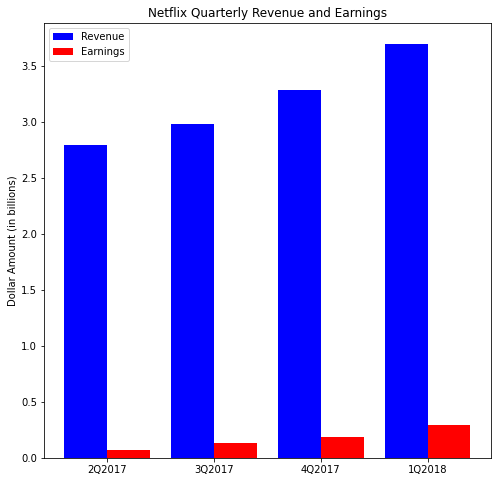

In [13]:
# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

# Revenue
n = 1  # This is our first dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars1_x = [t*element + w*n for element
             in range(d)]

# Earnings
n = 2  # This is our second dataset (out of 2)
t = 2 # Number of dataset
d = 4 # Number of sets of bars
w = 0.8 # Width of each bar
bars2_x = [t*element + w*n for element
             in range(d)]

middle_x = [ (a + b) / 2.0 for a, b in zip(bars1_x, bars2_x)]
labels = ["Revenue", "Earnings"]

plt.figure(figsize = (8, 8))
plt.bar(bars1_x, revenue_by_quarter, color = 'blue')
plt.bar(bars2_x, earnings_by_quarter, color = 'red')
plt.xticks(middle_x, quarter_labels)
plt.legend(labels)
plt.title ("Netflix Quarterly Revenue and Earnings")
plt.ylabel("Dollar Amount (in billions)")
plt.savefig('netflix_quarterly_bar.png')
plt.show()

## Graph Literacy
What are your first impressions looking at the visualized data?

- Does Revenue follow a trend?
- Do Earnings follow a trend?
- Roughly, what percentage of the revenue constitutes earnings?

In [15]:
# Revenue went up each quarter. It is impossible to tell using this bar graph whether the rate of growth was linear, 
# exponential, or something else. 

# Likewise, earnings went up each quarter. Again, it is impossible to tell using a bar graph whether the rate of growth
# was linear, exponential, or something else.

# Also, since revenue is so much higher than earnings, it's difficult to make sense of the trends and how they relate to
# each other given how this bar graph is set up. I think it would have been better to make a bar chart with the bars 
# stacked one on top of the other. Perhaps I will do this below as an exercise for the interested data scientist.

# As for the percentage of revenue which constitutes earnings, it's best to calculate that out directly since we can:
# (Note that this calculation is being done by me and was not performed by Codecademy.)
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]

rev_by_q = np.array(revenue_by_quarter)
earn_by_q = np.array(earnings_by_quarter)

percentage_by_quarter = earn_by_q / rev_by_q
print(percentage_by_quarter)

# Looking at the output of the print statement, that looks to be about 5% on average.


[0.02351254 0.04348658 0.05638906 0.07841081]


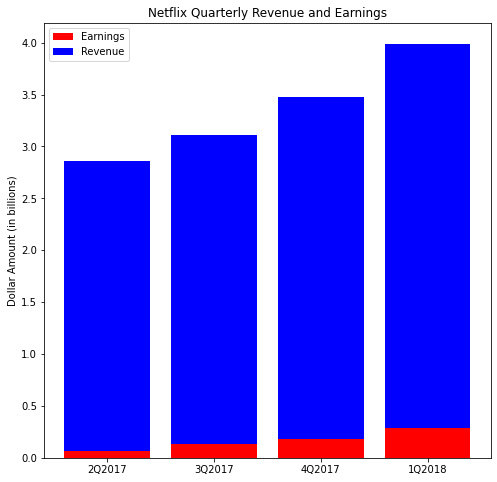

In [22]:
# For metaphorical shits and giggles, let's see if this bar graph gets easier to interpret of we stack the bars one atop
# the other.

# The metrics below are in billions of dollars
revenue_by_quarter = [2.79, 2.98,3.29,3.7]
earnings_by_quarter = [.0656,.12959,.18552,.29012]
quarter_labels = ["2Q2017","3Q2017","4Q2017", "1Q2018"]

labels = ["Earnings", "Revenue"]

plt.figure(figsize = (8, 8))
plt.bar(range(len(earnings_by_quarter)), earnings_by_quarter, color = 'red')
plt.bar(range(len(earnings_by_quarter)), revenue_by_quarter, bottom = earnings_by_quarter, color = 'blue')
plt.legend(labels)
plt.title ("Netflix Quarterly Revenue and Earnings")
plt.ylabel("Dollar Amount (in billions)")
plt.xticks(range(len(earnings_by_quarter)), quarter_labels)
plt.show()


MAC note: In my opinion, the above is a better visualization of the data than the side-by-side error bars Codecademy directed me to plot. It is much easier to see given this plot that the earnings are a small fraction of the revenue. However, I think that one can only "legally" do this when the sum of the bars is meaningful, and it's not clear that this is the case here. Still, the visuals appeal to me a bit better.

## Step 8

In this last step, we will compare Netflix stock to the Dow Jones Industrial Average in 2017. We will accomplish this by plotting two line charts side by side in one figure. 

Since `Price` which is the most relevant data is in the Y axis, let's map our subplots to align vertically side by side.
- We have set up the code for you on line 1 in the cell below. Complete the figure by passing the following arguments to `plt.subplots()` for the first plot, and tweaking the third argument for the second plot
    - `1`-- the number of rows for the subplots
    - `2` -- the number of columns for the subplots
    - `1` -- the subplot you are modifying

- Chart the Netflix Stock Prices in the left-hand subplot. Using your data frame, access the `Date` and `Price` charts as the x and y axes respectively. Hint: (`netflix_stocks['Date'], netflix_stocks['Price']`)
- Assign "Netflix" as a title to this subplot. Hint: `ax1.set_title()`
- For each subplot, `set_xlabel` to `"Date"` and `set_ylabel` to `"Stock Price"`
- Chart the Dow Jones Stock Prices in the left-hand subplot. Using your data frame, access the `Date` and `Price` charts as the x and y axes respectively. Hint: (`dowjones_stocks['Date'], dowjones_stocks['Price']`)
- Assign "Dow Jones" as a title to this subplot. Hint: `plt.set_title()`
- There is some crowding in the Y axis labels, add some space by calling `plt.subplots_adjust(wspace=.5)`
- Be sure to `.show()` your plots.


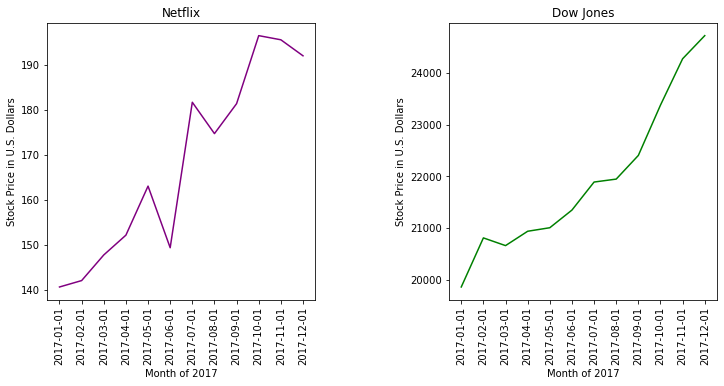

In [14]:
plt.figure(figsize = (12, 8))
# Left plot Netflix
ax1 = plt.subplot(1, 2, 1)
ax1.plot(netflix_stocks['Date'], netflix_stocks['Price'], color = 'purple')
ax1.set_title('Netflix')
ax1.set_xlabel("Month of 2017")
ax1.set_ylabel("Stock Price in U.S. Dollars")
ax1.set_xticklabels(netflix_stocks['Date'], rotation = 90)


# Right plot Dow Jones
ax2 = plt.subplot(1, 2, 2)
plt.plot(dowjones_stocks['Date'], dowjones_stocks['Price'], color = 'green')
ax2.set_title('Dow Jones')
ax2.set_xlabel("Month of 2017")
ax2.set_ylabel("Stock Price in U.S. Dollars")
ax2.set_xticklabels(dowjones_stocks['Date'], rotation = 90)
plt.subplots_adjust(wspace=.5, bottom = 0.4)

plt.savefig('netflix_dow_jones_comparison.png')
plt.show()

- How did Netflix perform relative to Dow Jones Industrial Average in 2017?
MAC: Both curves trend upward, if that is what the question is getting at. Broadly speaking, both curves ended the 2017 calendar year at a peak, although there are indications that the Netflix curve had peaked and was on its way back down. If you smooth over the peaks in the Netflix curve, the slope of the curve seems broadly similar to the slope of the curve of the Dow Jones data. However, without further numerical analysis that assertion is tentative at best.

- Which was more volatile?
MAC: Netflix stock prices were clearly more volatile.

- How do the prices of the stocks compare?
MAC: This question is poorly phrased. The Dow Jones is an average over 30 large companies, whereas Netflix is obviously just one company's stock. Are we talking about how the price of Netflix stock compares to the overall Dow Jones average? Clearly, it's a fraction of the Dow Jones average. That fraction likely varies. As noted above, the trend in prices is broadly similar. Are we talking about how the prices compare at the beginning of each curve to the end of the same curve? In that case, we already answered that question above.


# Step 9

It's time to make your presentation! Save each of your visualizations as a png file with `plt.savefig("filename.png")`.

As you prepare your slides, think about the answers to the graph literacy questions. Embed your observations in the narrative of your slideshow!

Remember that your slideshow must include:
- A title slide
- A list of your visualizations and your role in their creation for the "Stock Profile" team
- A visualization of the distribution of the stock prices for Netflix in 2017
- A visualization and a summary of Netflix stock and revenue for the past four quarters and a summary
- A visualization and a brief summary of their earned versus actual earnings per share
- A visualization of Netflix stock against the Dow Jones stock (to get a sense of the market) in 2017
